### Baseline Models Template for 2016 - 2020 Data (exports)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA, SparsePCA
from sklearn.covariance import empirical_covariance
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

import seaborn as sns
import joblib
import os
#from adspy_shared_utilities import plot_decision_tree
from datetime import datetime

In [2]:
rng = 42

In [3]:
p = '../data/'
input_name = 'cleaned_GDP.csv'

df = pd.read_csv(f'{p}{input_name}')

#### Preprocessing

In [4]:
def df_filtering(df, i_e = 'I', f_cols = []):

    filtered_df = df[df.i_e == i_e]
    filtered_df = filtered_df[f_cols+['act']]
    
    return filtered_df

In [5]:
df.columns

Index(['control_number', 'species_code', 'genus', 'species', 'wildlf_desc',
       'wildlf_cat', 'cartons', 'qty', 'unit', 'value_x', 'ctry_org',
       'ctry_ie', 'purp', 'src', 'trans_mode', 'act', 'dp_cd', 'disp_date',
       'ship_date', 'i_e', 'pt_cd', 'specific_generic_name', 'disp_date_yyyy',
       'disp_date_mm', 'ship_date_yyyy', 'ship_date_mm', 'disp_ship_date',
       'ctry_ie_name', '2020GDP'],
      dtype='object')

In [6]:
# First convert all NaN to 0 for GDP2020
index_nums = df[df['2020GDP'].isnull()].index
for index_num in index_nums:
    df.at[index_num,'2020GDP']=0

In [7]:
non_feature_cols = ['control_number', 'disp_date', 'i_e', 'ship_date', 
                    'cartons', 'qty', 'unit', 'specific_generic_name',
                    'genus', 'species', 'wildlf_cat', 
                    'disp_date_yyyy', 'disp_date_mm', 'disp_ship_date']

target = ['act', 'dp_cd']

# FYI - had to change to value -> value_x; also added 2020GDP

feature_cols = ['species_code', 'wildlf_desc', 
                'ctry_org', 'ctry_ie','purp', 'src', 'trans_mode', 'pt_cd', 
                 'value_x', 'ship_date_mm', '2020GDP']

In [8]:
#import_df = df_filtering(df, i_e = 'I', f_cols = feature_cols)
export_df = df_filtering(df, i_e = 'E', f_cols = feature_cols)
# import: 590505 rows × 11 columns
# export: 299340 rows × 11 columns

In [9]:
# set up folder to save results
# os.makedirs('export_run5_TargetEncoding_JP')

In [10]:
prefix = 'export_run3_TargetEncoding/export'

In [11]:
def data_split(df):
    X, y = df.iloc[:,:-1], df.iloc[:,-1:]
    y = np.where(y['act']=='R',1,0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng, stratify=y) 
    
    return X_train, X_test, y_train, y_test
    

In [12]:
X_train, X_test, y_train, y_test = data_split(export_df)

#### column transformer w/ TargetEncoding

In [13]:
from category_encoders.target_encoder import TargetEncoder

In [14]:
categorical_var = ['species_code', 'wildlf_desc', 'ctry_org', 'ctry_ie','purp', 'src', 
                   'trans_mode', 'pt_cd']
numerical_var = ['value_x', '2020GDP']

In [15]:
ct_target = make_column_transformer(
    (StandardScaler(), numerical_var),
    (TargetEncoder(), categorical_var),
    remainder='passthrough')
le = LabelEncoder()

C:\Users\yujin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\yujin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [16]:
X_train = ct_target.fit_transform(X_train, y_train)
joblib.dump(X_train, 'X_train_tragetEncoding.joblib')

X_test = ct_target.transform(X_test)
joblib.dump(X_test, 'X_test_tragetEncoding.joblib')
# Found unknown categories 


C:\Users\yujin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\yujin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


['X_test_tragetEncoding.joblib']

In [17]:
X_train[0], X_train[1]

(array([-9.29323220e-02, -1.46821901e+00,  2.86532951e-03,  6.32894771e-03,
         2.32403718e-03,  4.01304239e-03,  8.17041982e-03,  7.55092976e-03,
         4.95164410e-03,  7.69537707e-03,  6.00000000e+00]),
 array([-9.45030973e-02, -1.46821901e+00,  2.28389029e-12,  6.32894771e-03,
         3.43848109e-03,  4.01304239e-03,  8.17041982e-03,  7.55092976e-03,
         4.95164410e-03,  7.69537707e-03,  6.00000000e+00]))

## MDS

In [18]:
from sklearn.manifold import MDS
from itertools import cycle, islice

In [20]:
X_mds = MDS(n_components=2, random_state=42).fit_transform(X_train)

MemoryError: Unable to allocate 117. GiB for an array with shape (125068, 125068) and data type float64

In [21]:
colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_train) + 1),
        )
    )
)

NameError: name 'X_mds' is not defined

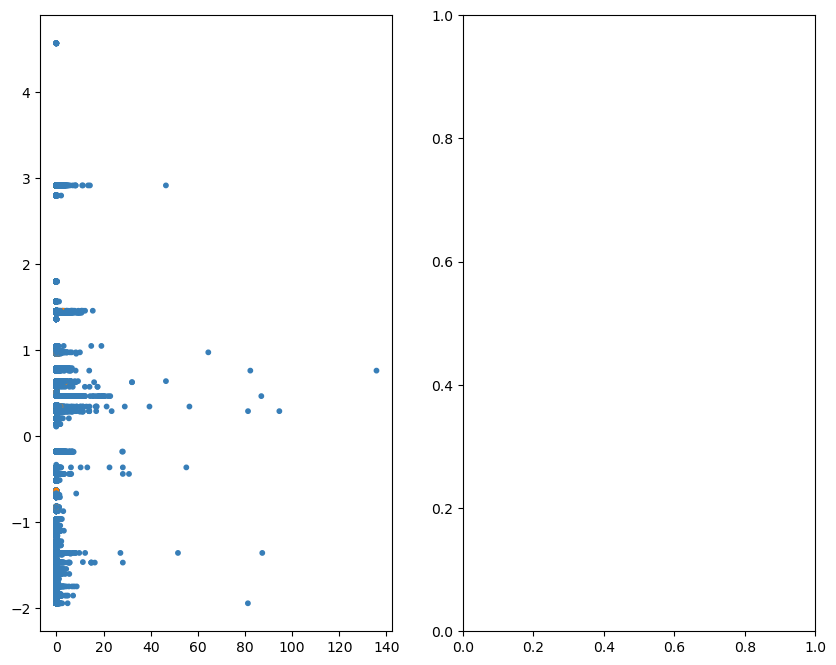

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].scatter(X_train[:, 0], X_train[:, 1], s=10, color=colors[y_train])
axes[1].scatter(X_mds[:, 0], X_mds[:, 1], s=10, color=colors[y_train])

axes[0].set_title("Original")
axes[1].set_title("MDS")
plt.show()

#### Dummy Classifers

In [ ]:
start = datetime.now()
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

# dummy_majority.score(X_test, y_test)
dummy_predicted = dummy_majority.predict(X_test)

In [ ]:
joblib.dump(dummy_majority, f'{prefix}_dummy_majority_clf.joblib')

#### Logistic Regression

In [ ]:
start = datetime.now()
lr = LogisticRegression(random_state=rng).fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted, labels = [1,0])
print('Logistic regression classifier (default settings)\n', confusion)
cm_display = ConfusionMatrixDisplay(confusion, display_labels=[1,0])
cm_display.plot()

In [ ]:
start = datetime.now()
lr_balanced = LogisticRegression(random_state=rng, class_weight='balanced').fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

lr_balanced_predicted = lr_balanced.predict(X_test)
confusion = confusion_matrix(y_test, lr_balanced_predicted)
print('Logistic regression classifier (balanced)\n', confusion)

In [ ]:
joblib.dump(lr, f'{prefix}_lr_clf.joblib')
joblib.dump(lr_balanced, f'{prefix}_lr_balanced_clf.joblib')

#### Decision Tree

In [ ]:
start = datetime.now()
decision_tree_clf = DecisionTreeClassifier(random_state=rng).fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

In [ ]:
tree_predicted = decision_tree_clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('Logistic regression classifier (balanced)\n', confusion)

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(decision_tree_clf, feature_cols)
plt.show()

print('Feature importances: {}'.format(decision_tree_clf.feature_importances_[::-1]))

In [ ]:
joblib.dump(decision_tree_clf, f'{prefix}_decision_tree_clf.joblib')

#### Random Forest

In [ ]:
start = datetime.now()
rf_clf = RandomForestClassifier(random_state=rng).fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

In [ ]:
rf_predicted = rf_clf.predict(X_test)
confusion = confusion_matrix(y_test, rf_predicted)
print('Logistic regression classifier (balanced)\n', confusion)

In [ ]:
joblib.dump(rf_clf, f'{prefix}_rf_clf.joblib')

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(rf_clf, feature_cols)
plt.show()

print('Feature importances: {}'.format(rf_clf.feature_importances_[::-1]))

#### Model Evaluation

In [ ]:
print('Most frequent class (dummy classifier) \n', 
      classification_report(y_test, dummy_predicted, target_names=['clear', 'seized']))
print('Logistic Regression \n', 
      classification_report(y_test, lr_predicted, target_names=['clear', 'seized']))
print('Logistic Regression (balanced) \n', 
      classification_report(y_test, lr_balanced_predicted, target_names=['clear', 'seized']))
print('Decision Tree \n', 
      classification_report(y_test, tree_predicted, target_names=['clear', 'seized']))
print('Random Forest \n', 
      classification_report(y_test, rf_predicted, target_names=['clear', 'seized']))

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

#### PCA

In [ ]:
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()
    
def plot_pca(pca, f_names, top_k = 10):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.imshow(pca.components_[0:top_k], interpolation = 'none', cmap = 'plasma')
    feature_names=f_names
    plt.xticks(np.arange(-0., len(feature_names), 1) , feature_names, rotation = 90, fontsize=12)
    plt.yticks(np.arange(0., 2, 1), ['First PC', 'Second PC'], fontsize = 16)
    plt.colorbar()

In [ ]:
ct.named_transformers_
transformed_features = ct.named_transformers_['onehotencoder'].get_feature_names_out()

In [ ]:
pca = PCA(n_components=2, random_state=rng)
X_train_pca = pca.fit_transform(X_train_t.toarray())
print(X_train_t.shape, X_train_pca.shape)

In [ ]:
joblib.dump(X_train_pca, f'{prefix}_X_train_pca.joblib')

In [ ]:
sns.heatmap(empirical_covariance(X_train_pca))

In [ ]:
plot_labelled_scatter(X_train_pca, y_train_t, ['clear', 'seized'])

In [ ]:
plot_pca(pca, transformed_features)

In [ ]:
pca_sparse = SparsePCA(n_components=2, random_state=rng)
X_train_pca_sparse = pca_sparse.fit_transform(X_train_t.toarray())

In [ ]:
joblib.dump(X_train_pca_sparse, f'{prefix}_X_train_pca_sparse.joblib')

In [ ]:
sns.heatmap(empirical_covariance(X_train_pca_sparse))

In [ ]:
plot_pca(pca_sparse, transformed_features)